# CBD Project 1

In [263]:
import numpy as np

In [264]:
import os
print(os.getcwd())

C:\Users\Erik Tomlin


# Time Synchronizing

In [265]:
import datetime
import pytz
ntp_epoch = datetime.datetime(1900,1,1)
unix_epoch = datetime.datetime(1970,1,1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def sectodatetime(ntp_seconds):
    return datetime.datetime.fromtimestamp(ntp_seconds - ntp_delta).replace(microsecond = 0).strftime("%A, %B %d, %Y %I:%M:%S")

In [266]:
#sectodatetime(sTime[5000]-57600)

# Function to track number of Dives

In [267]:
def getdivecount(depth):
    divecount = 0
    atsurface = True
    i = 0
    ep = len(depth)
    
    for i in range(0,ep):
        
        if depth[i] > (1.25 * np.min(depth)) and atsurface == True:
            atsurface = False
        
        if depth[i] < (1.25 * np.min(depth)) and atsurface == False:
            atsurface = True
            divecount += 1
    i+=1
        
    return divecount

# Function to find Start and stop of Dives

In [268]:
def getdivetimes(depth,dives,time):
    divetimecount = dives * 2
    import array
    atsurface = True
    i = 0
    ep = len(depth)
    a = 0
    times = np.zeros(divetimecount,)
    
    
    for i in range(0,ep):
        
        if depth[i] > (1.25 * np.min(depth)) and atsurface == True:
            atsurface = False
            times[a] = time[i]
            a +=1
        
        if depth[i] < (1.25 * np.min(depth)) and atsurface == False:
            atsurface = True
            times[a] = time[i]
            a +=1
           
    i+=1
        
    return times

In [269]:
def getdiveindex(depth,dives):
    divetimecount = (dives * 2) + 1
    import array
    atsurface = True
    i = 0
    ep = len(depth)
    a = 0
    index = np.zeros(divetimecount,)
    
    
    for i in range(0,ep):
        
        if depth[i] > (1.25 * np.min(depth)) and atsurface == True:
            atsurface = False
            index[a] = i
            a +=1
        
        if depth[i] < (1.25 * np.min(depth)) and atsurface == False:
            atsurface = True
            index[a] = i
            a +=1
           
    i+=1
        
    return index

# Square and Cubic Functions for SSP

In [270]:
def square(x):
    return x * x
def cube(x):
    return x * x * x

# Importing Summer and Winter Comparison Data for Oregon Shelf Surface Piercing Profiler Mooring

In [271]:
import pandas as pd
urls = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/OrSSPPM_Summ_20190718T075002-20190718T195437.csv"
OSSPPM_Summ = pd.read_csv(urls, index_col=0)
urlw = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/OrSSPPM_Wint_20181013T070629-20181013T190953.csv"
OSSPPM_Wint = pd.read_csv(urlw, index_col=0)


In [272]:
sCond =np.array( OSSPPM_Summ['conductivity'][:])
sTemp = np.array(OSSPPM_Summ['temperature'][:])
sPress = np.array(OSSPPM_Summ['pressure'][:])
sTime = np.array(OSSPPM_Summ['time'][:])
#len(sPress)

In [273]:
wCond = np.array(OSSPPM_Wint['conductivity'][:])
wTemp = np.array(OSSPPM_Wint['temperature'][:])
wPress = np.array(OSSPPM_Wint['pressure'][:])
wTime = np.array(OSSPPM_Wint['time'][:])
#print(wCond)

In [274]:
sdivecount = getdivecount(sPress)
print(sdivecount)

2


In [275]:
wdivecount = getdivecount(wPress)
print(wdivecount)

2


In [276]:
#stimes = getdivetimes(sPress,sdivecount,sTime)

In [277]:
sgraphdives = getdiveindex(sPress,sdivecount)
#print(sgraphdives)

In [278]:
wgraphdives = getdiveindex(wPress,wdivecount)

In [279]:
st2 = square(sTemp)
st3 = cube(sTemp)
wt2 = square(wTemp)
wt3 = cube(wTemp)

wSSP = 1449.2 + 4.6 * wTemp - 0.055 * wt2 + 0.00029 * wt3 + (1.34 - 0.01 * wTemp) + 0.016 * wPress
sSSP = 1449.2 + 4.6 * sTemp - 0.055 * st2 + 0.00029 * st3 + (1.34 - 0.01 * sTemp) + 0.016 * sPress
#print(wSSP)

In [280]:
import matplotlib.pyplot as plt

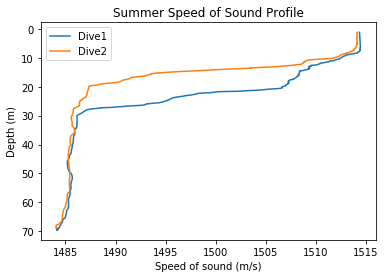

In [281]:
i = 0
c = 0
while i < sdivecount*2:
    plt.plot(sSSP[int(sgraphdives[i]):int(sgraphdives[i+1])],sPress[int(sgraphdives[i]):int(sgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.title('Summer Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

In [282]:
i = 0
c = 0
while i < sdivecount*2:
    q = int(sgraphdives[i])
    w = int(sgraphdives[i+1])
    print('The start of dive ' + str(c+1) + ' is ' + str(sectodatetime(sTime[q]-57600)))
    print('The end of dive ' + str(c+1) + ' is ' + str(sectodatetime(sTime[w]-57600)))
    i+=2
    c+=1

The start of dive 1 is Wednesday, July 17, 2019 08:50:02
The end of dive 1 is Wednesday, July 17, 2019 08:54:03
The start of dive 2 is Wednesday, July 17, 2019 08:50:02
The end of dive 2 is Wednesday, July 17, 2019 08:54:36


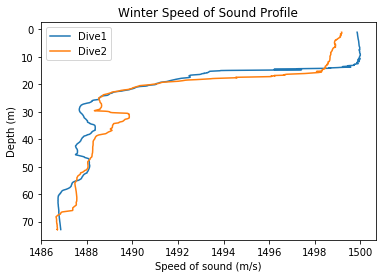

In [283]:
i = 0
c = 0
while i < wdivecount*2:
    plt.plot(wSSP[int(wgraphdives[i]):int(wgraphdives[i+1])],wPress[int(wgraphdives[i]):int(wgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.title('Winter Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

In [284]:
i = 0
c = 0
while i < wdivecount*2:
    q = int(wgraphdives[i])
    w = int(wgraphdives[i+1])
    print('The start of dive ' + str(c+1) + ' is ' + str(sectodatetime(wTime[q]-57600)))
    print('The end of dive ' + str(c+1) + ' is ' + str(sectodatetime(wTime[w]-57600)))
    i+=2
    c+=1

The start of dive 1 is Friday, October 12, 2018 08:06:29
The end of dive 1 is Friday, October 12, 2018 08:10:05
The start of dive 2 is Friday, October 12, 2018 08:06:29
The end of dive 2 is Friday, October 12, 2018 08:09:53


# Comparison for Oregon Offshore Cabled Shallow Profiler Mooring

In [285]:
urls = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/OrOCSPM_Summ_20190718T000001-20190719T000001.csv"
OOCSPM_Summ = pd.read_csv(urls, index_col=0)
urlw = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/OrOCSPM_Wint_20200102T000002-20200103T000001.csv"
OOCSPM_Wint = pd.read_csv(urlw, index_col=0)


In [286]:
sCond =np.array(OOCSPM_Summ['seawater_conductivity'][:])
sTemp = np.array(OOCSPM_Summ['seawater_temperature'][:])
sPress = np.array(OOCSPM_Summ['seawater_pressure'][:])
sTime = np.array(OOCSPM_Summ['time'][:])
#print(sTemp)

In [287]:
sdivecount = getdivecount(sPress)
print(sdivecount)

0


In [288]:
sgraphdives = getdiveindex(sPress,sdivecount)

In [289]:
wCond = np.array(OOCSPM_Wint['seawater_conductivity'][:])
wTemp = np.array(OOCSPM_Wint['seawater_temperature'][:])
wPress = np.array(OOCSPM_Wint['seawater_pressure'][:])
wTime = np.array(OOCSPM_Wint['time'][:])
#print(wCond)

In [290]:
wdivecount = getdivecount(wPress)
print(wdivecount)

0


In [291]:
wgraphdives = getdiveindex(wPress,wdivecount)

In [292]:
st2 = square(sTemp)
st3 = cube(sTemp)
wt2 = square(wTemp)
wt3 = cube(wTemp)

wSSP = 1449.2 + 4.6 * wTemp - 0.055 * wt2 + 0.00029 * wt3 + (1.34 - 0.01 * wTemp) + 0.016 * wPress
sSSP = 1449.2 + 4.6 * sTemp - 0.055 * st2 + 0.00029 * st3 + (1.34 - 0.01 * sTemp) + 0.016 * sPress
#print(wSSP)

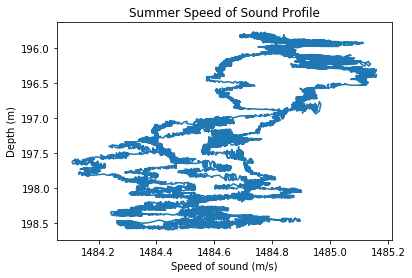

In [293]:
plt.plot(sSSP,sPress)
plt.title('Summer Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.show()

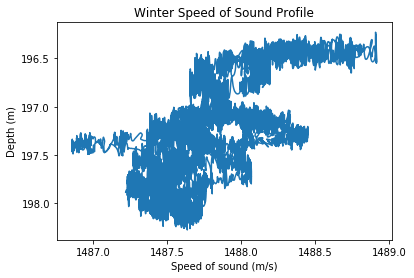

In [294]:
plt.plot(wSSP,wPress)
plt.title('Winter Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.show()

# Comparison for Oregon Offshore Cabled Deep Profiler Mooring

In [295]:
urls = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/OrOCDPM_Summ_20190703T000128-20190703T230343.csv"
OOCDPM_Summ = pd.read_csv(urls, index_col=0)
urlw = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/OrOCDPM_Wint_20151118T000046-20151118T225019.csv"
OOCDPM_Wint = pd.read_csv(urlw, index_col=0)


In [296]:
sCond =np.array(OOCDPM_Summ['conductivity_millisiemens'][:])
sTemp = np.array(OOCDPM_Summ['temp'][:])
sPress = np.array(OOCDPM_Summ['pressure'][:])
sTime = np.array(OOCDPM_Summ['ingestion_timestamp'][:])
#print(sTemp)

In [297]:
sdivecount = getdivecount(sPress)
print(sdivecount)

12


In [298]:
sgraphdives = getdiveindex(sPress,sdivecount)

In [299]:
wCond = np.array(OOCDPM_Wint['conductivity_millisiemens'][:])
wTemp = np.array(OOCDPM_Wint['temp'][:])
wPress = np.array(OOCDPM_Wint['pressure'][:])
wTime = np.array(OOCDPM_Wint['ingestion_timestamp'][:])
#print(wCond)

In [300]:
wdivecount = getdivecount(wPress)
print(wdivecount)

6


In [301]:
wgraphdives = getdiveindex(wPress,wdivecount)

In [302]:
st2 = square(sTemp)
st3 = cube(sTemp)
wt2 = square(wTemp)
wt3 = cube(wTemp)

wSSP = 1449.2 + 4.6 * wTemp - 0.055 * wt2 + 0.00029 * wt3 + (1.34 - 0.01 * wTemp) + 0.016 * wPress
sSSP = 1449.2 + 4.6 * sTemp - 0.055 * st2 + 0.00029 * st3 + (1.34 - 0.01 * sTemp) + 0.016 * sPress
#print(wSSP)

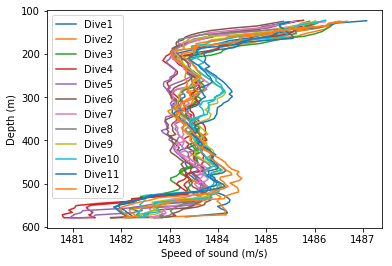

In [303]:
i = 0
c = 0
while i < sdivecount*2:
    plt.plot(sSSP[int(sgraphdives[i]):int(sgraphdives[i+1])],sPress[int(sgraphdives[i]):int(sgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
    
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

In [304]:
i = 0
c = 0
while i < sdivecount*2:
    q = int(sgraphdives[i])
    w = int(sgraphdives[i+1])
    print('The start of dive ' + str(c+1) + ' is ' + str(sectodatetime(sTime[q]-57600)))
    print('The end of dive ' + str(c+1) + ' is ' + str(sectodatetime(sTime[w]-57600)))
    i+=2
    c+=1

The start of dive 1 is Monday, August 12, 2019 06:42:45
The end of dive 1 is Monday, August 12, 2019 06:42:45
The start of dive 2 is Monday, August 12, 2019 06:42:45
The end of dive 2 is Monday, August 12, 2019 06:42:45
The start of dive 3 is Monday, August 12, 2019 06:42:45
The end of dive 3 is Monday, August 12, 2019 06:42:45
The start of dive 4 is Monday, August 12, 2019 06:42:45
The end of dive 4 is Monday, August 12, 2019 06:42:45
The start of dive 5 is Monday, August 12, 2019 06:42:45
The end of dive 5 is Monday, August 12, 2019 06:42:45
The start of dive 6 is Monday, August 12, 2019 06:42:45
The end of dive 6 is Monday, August 12, 2019 06:42:45
The start of dive 7 is Monday, August 12, 2019 06:42:45
The end of dive 7 is Monday, August 12, 2019 06:42:45
The start of dive 8 is Monday, August 12, 2019 06:42:45
The end of dive 8 is Monday, August 12, 2019 06:42:45
The start of dive 9 is Monday, August 12, 2019 06:42:45
The end of dive 9 is Monday, August 12, 2019 06:42:45
The start 

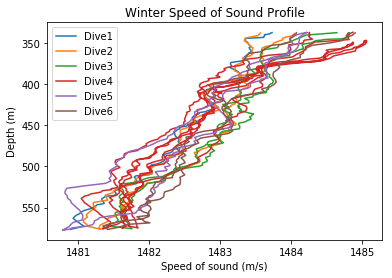

In [305]:
i = 0
c = 0
while i < wdivecount*2:
    plt.plot(wSSP[int(wgraphdives[i]):int(wgraphdives[i+1])],wPress[int(wgraphdives[i]):int(wgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.title('Winter Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

In [306]:
i = 0
c = 0
while i < wdivecount*2:
    q = int(wgraphdives[i])
    w = int(wgraphdives[i+1])
    print('The start of dive ' + str(c+1) + ' is ' + str(sectodatetime(wTime[q]-57600)))
    print('The end of dive ' + str(c+1) + ' is ' + str(sectodatetime(wTime[w]-57600)))
    i+=2
    c+=1

The start of dive 1 is Tuesday, January 09, 2018 06:47:16
The end of dive 1 is Tuesday, January 09, 2018 06:47:16
The start of dive 2 is Tuesday, January 09, 2018 06:47:16
The end of dive 2 is Tuesday, January 09, 2018 06:47:16
The start of dive 3 is Tuesday, January 09, 2018 06:47:16
The end of dive 3 is Tuesday, January 09, 2018 06:47:16
The start of dive 4 is Tuesday, January 09, 2018 06:47:16
The end of dive 4 is Tuesday, January 09, 2018 06:47:17
The start of dive 5 is Tuesday, January 09, 2018 06:47:17
The end of dive 5 is Tuesday, January 09, 2018 06:47:17
The start of dive 6 is Tuesday, January 09, 2018 06:47:17
The end of dive 6 is Tuesday, January 09, 2018 06:47:17


# Comparison for Oregon Slope Base Shallow Profiler

In [307]:
urls = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/OrSBSP_Summ_20190718T000001-20190719T000001.csv"
OSBSP_Summ = pd.read_csv(urls, index_col=0)
urlw = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/OrSBSP_Wint_20200102T000002-20200103T000001.csv"
OSBSP_Wint = pd.read_csv(urlw, index_col=0)


In [308]:
sCond =np.array(OSBSP_Summ['seawater_conductivity'][:])
sTemp = np.array(OSBSP_Summ['seawater_temperature'][:])
sPress = np.array(OSBSP_Summ['seawater_pressure'][:])
sTime = np.array(OSBSP_Summ['time'][:])
#print(sTemp)

In [309]:
sdivecount = getdivecount(sPress)
print(sdivecount)

0


In [310]:
sgraphdives = getdiveindex(sPress,sdivecount)

In [311]:
wCond = np.array(OSBSP_Wint['seawater_conductivity'][:])
wTemp = np.array(OSBSP_Wint['seawater_temperature'][:])
wPress = np.array(OSBSP_Wint['seawater_pressure'][:])
wTime = np.array(OSBSP_Wint['time'][:])
#print(wCond)

In [312]:
wdivecount = getdivecount(wPress)
print(wdivecount)

0


In [313]:
wgraphdives = getdiveindex(wPress,wdivecount)

In [314]:
st2 = square(sTemp)
st3 = cube(sTemp)
wt2 = square(wTemp)
wt3 = cube(wTemp)

wSSP = 1449.2 + 4.6 * wTemp - 0.055 * wt2 + 0.00029 * wt3 + (1.34 - 0.01 * wTemp) + 0.016 * wPress
sSSP = 1449.2 + 4.6 * sTemp - 0.055 * st2 + 0.00029 * st3 + (1.34 - 0.01 * sTemp) + 0.016 * sPress
#print(wSSP)

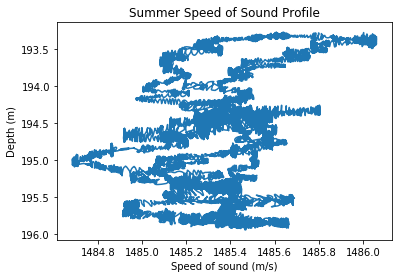

In [315]:
i = 0
c = 0
while i < sdivecount*2:
    plt.plot(sSSP[int(sgraphdives[i]):int(sgraphdives[i+1])],sPress[int(sgraphdives[i]):int(sgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.plot(sSSP,sPress)
plt.title('Summer Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.show()

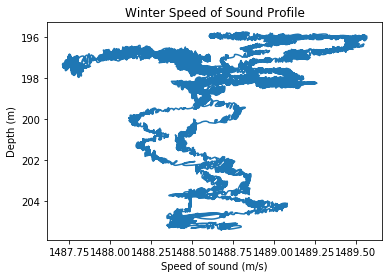

In [316]:
i = 0
c = 0
while i < wdivecount*2:
    plt.plot(wSSP[int(wgraphdives[i]):int(wgraphdives[i+1])],wPress[int(wgraphdives[i]):int(wgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.plot(wSSP,wPress)
plt.title('Winter Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.show()

# Comparison for Oregon Slope Base Deep Profiler

In [317]:
urls = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/OrSBDP_Summ_20190718T000145-20190718T181359.csv"
OSBDP_Summ = pd.read_csv(urls, index_col=0)
urlw = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/OrSBDP_Wint_20151013T000046-20151013T165530.csv"
OSBDP_Wint = pd.read_csv(urlw, index_col=0)


In [318]:
sCond =np.array(OSBDP_Summ['conductivity_millisiemens'][:])
sTemp = np.array(OSBDP_Summ['temp'][:])
sPress = np.array(OSBDP_Summ['pressure'][:])
sTime = np.array(OSBDP_Summ['time'][:])
#print(sTemp)

In [319]:
sdivecount = getdivecount(sPress)
print(sdivecount)

1


In [320]:
sgraphdives = getdiveindex(sPress,sdivecount)

In [321]:
wCond = np.array(OSBDP_Wint['conductivity_millisiemens'][:])
wTemp = np.array(OSBDP_Wint['temp'][:])
wPress = np.array(OSBDP_Wint['pressure'][:])
wTime = np.array(OSBDP_Wint['time'][:])
#print(wCond)

In [322]:
wdivecount = getdivecount(wPress)
print(wdivecount)

2


In [323]:
wgraphdives = getdiveindex(wPress,wdivecount)

In [324]:
st2 = square(sTemp)
st3 = cube(sTemp)
wt2 = square(wTemp)
wt3 = cube(wTemp)

wSSP = 1449.2 + 4.6 * wTemp - 0.055 * wt2 + 0.00029 * wt3 + (1.34 - 0.01 * wTemp) + 0.016 * wPress
sSSP = 1449.2 + 4.6 * sTemp - 0.055 * st2 + 0.00029 * st3 + (1.34 - 0.01 * sTemp) + 0.016 * sPress
#print(wSSP)

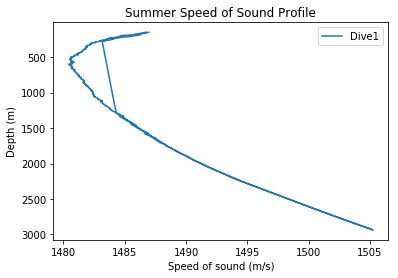

In [325]:
i = 0
c = 0
while i < sdivecount*2:
    plt.plot(sSSP[int(sgraphdives[i]):int(sgraphdives[i+1])],sPress[int(sgraphdives[i]):int(sgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.title('Summer Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

In [326]:
i = 0
c = 0
while i < sdivecount*2:
    q = int(sgraphdives[i])
    w = int(sgraphdives[i+1])
    print('The start of dive ' + str(c+1) + ' is ' + str(sectodatetime(sTime[q]-57600)))
    print('The end of dive ' + str(c+1) + ' is ' + str(sectodatetime(sTime[w]-57600)))
    i+=2
    c+=1

The start of dive 1 is Wednesday, July 17, 2019 01:05:09
The end of dive 1 is Wednesday, July 17, 2019 04:09:45


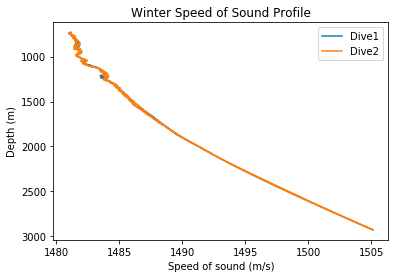

In [327]:
i = 0
c = 0
while i < wdivecount*2:
    plt.plot(wSSP[int(wgraphdives[i]):int(wgraphdives[i+1])],wPress[int(wgraphdives[i]):int(wgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.title('Winter Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

In [328]:
i = 0
c = 0
while i < wdivecount*2:
    q = int(wgraphdives[i])
    w = int(wgraphdives[i+1])
    print('The start of dive ' + str(c+1) + ' is ' + str(sectodatetime(wTime[q]-57600)))
    print('The end of dive ' + str(c+1) + ' is ' + str(sectodatetime(wTime[w]-57600)))
    i+=2
    c+=1

The start of dive 1 is Monday, October 12, 2015 01:00:46
The end of dive 1 is Monday, October 12, 2015 03:28:11
The start of dive 2 is Monday, October 12, 2015 03:58:49
The end of dive 2 is Monday, October 12, 2015 03:28:18


# Comparison for Axial Base Shallow Profiler

In [329]:
urls = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/ABSP_Summ_20190718T000001-20190718T235959.csv"
ABSP_Summ = pd.read_csv(urls, index_col=0)
urlw = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/ABSP_Wint_20200102T000002-20200102T235959.csv"
ABSP_Wint = pd.read_csv(urlw, index_col=0)


In [330]:
sCond =np.array(ABSP_Summ['seawater_conductivity'][:])
sTemp = np.array(ABSP_Summ['seawater_temperature'][:])
sPress = np.array(ABSP_Summ['seawater_pressure'][:])
sTime = np.array(ABSP_Summ['time'][:])
#print(sTemp)

In [331]:
sdivecount = getdivecount(sPress)
print(sdivecount)

13


In [332]:
sgraphdives = getdiveindex(sPress,sdivecount)

In [333]:
wCond = np.array(ABSP_Wint['seawater_conductivity'][:])
wTemp = np.array(ABSP_Wint['seawater_temperature'][:])
wPress = np.array(ABSP_Wint['seawater_pressure'][:])
wTime = np.array(ABSP_Wint['time'][:])
#print(wCond)

In [334]:
wdivecount = getdivecount(wPress)
print(wdivecount)

13


In [335]:
wgraphdives = getdiveindex(wPress,wdivecount)

In [336]:
st2 = square(sTemp)
st3 = cube(sTemp)
wt2 = square(wTemp)
wt3 = cube(wTemp)

wSSP = 1449.2 + 4.6 * wTemp - 0.055 * wt2 + 0.00029 * wt3 + (1.34 - 0.01 * wTemp) + 0.016 * wPress
sSSP = 1449.2 + 4.6 * sTemp - 0.055 * st2 + 0.00029 * st3 + (1.34 - 0.01 * sTemp) + 0.016 * sPress
#print(wSSP)

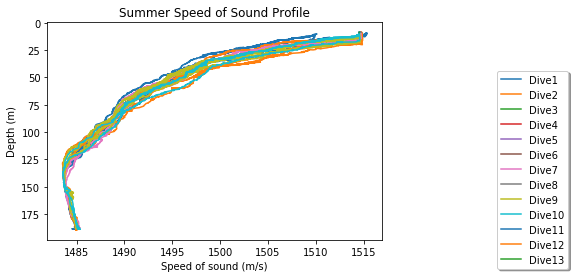

In [337]:
i = 0
c = 0
while i < sdivecount*2:
    plt.plot(sSSP[int(sgraphdives[i]):int(sgraphdives[i+1])],sPress[int(sgraphdives[i]):int(sgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.title('Summer Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

In [338]:
i = 0
c = 0
while i < sdivecount*2:
    q = int(sgraphdives[i])
    w = int(sgraphdives[i+1])
    print('The start of dive ' + str(c+1) + ' is ' + str(sectodatetime(sTime[q]-57600)))
    print('The end of dive ' + str(c+1) + ' is ' + str(sectodatetime(sTime[w]-57600)))
    i+=2
    c+=1

The start of dive 1 is Wednesday, July 17, 2019 01:00:01
The end of dive 1 is Wednesday, July 17, 2019 07:17:32
The start of dive 2 is Wednesday, July 17, 2019 07:17:35
The end of dive 2 is Wednesday, July 17, 2019 01:36:59
The start of dive 3 is Wednesday, July 17, 2019 01:37:02
The end of dive 3 is Wednesday, July 17, 2019 01:37:06
The start of dive 4 is Wednesday, July 17, 2019 01:37:09
The end of dive 4 is Wednesday, July 17, 2019 01:37:12
The start of dive 5 is Wednesday, July 17, 2019 01:37:26
The end of dive 5 is Wednesday, July 17, 2019 01:37:28
The start of dive 6 is Wednesday, July 17, 2019 01:37:32
The end of dive 6 is Wednesday, July 17, 2019 01:37:36
The start of dive 7 is Wednesday, July 17, 2019 01:37:39
The end of dive 7 is Wednesday, July 17, 2019 03:56:37
The start of dive 8 is Wednesday, July 17, 2019 03:56:39
The end of dive 8 is Wednesday, July 17, 2019 03:56:43
The start of dive 9 is Wednesday, July 17, 2019 03:56:44
The end of dive 9 is Wednesday, July 17, 2019 0

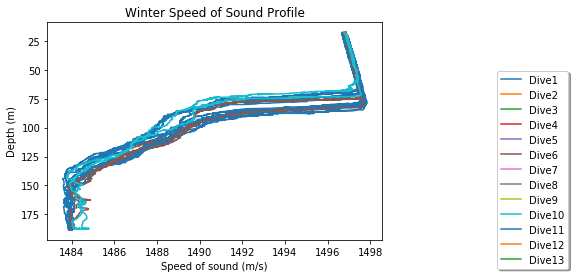

In [339]:
i = 0
c = 0
while i < wdivecount*2:
    plt.plot(wSSP[int(wgraphdives[i]):int(wgraphdives[i+1])],wPress[int(wgraphdives[i]):int(wgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.title('Winter Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

In [340]:
i = 0
c = 0
while i < wdivecount*2:
    q = int(wgraphdives[i])
    w = int(wgraphdives[i+1])
    print('The start of dive ' + str(c+1) + ' is ' + str(sectodatetime(wTime[q]-57600)))
    print('The end of dive ' + str(c+1) + ' is ' + str(sectodatetime(wTime[w]-57600)))
    i+=2
    c+=1

The start of dive 1 is Wednesday, January 01, 2020 12:00:02
The end of dive 1 is Wednesday, January 01, 2020 05:08:21
The start of dive 2 is Wednesday, January 01, 2020 05:08:24
The end of dive 2 is Wednesday, January 01, 2020 05:08:32
The start of dive 3 is Wednesday, January 01, 2020 05:08:42
The end of dive 3 is Wednesday, January 01, 2020 05:08:44
The start of dive 4 is Wednesday, January 01, 2020 05:08:55
The end of dive 4 is Wednesday, January 01, 2020 05:08:59
The start of dive 5 is Wednesday, January 01, 2020 05:09:06
The end of dive 5 is Wednesday, January 01, 2020 05:09:14
The start of dive 6 is Wednesday, January 01, 2020 05:09:16
The end of dive 6 is Wednesday, January 01, 2020 07:33:13
The start of dive 7 is Wednesday, January 01, 2020 07:33:26
The end of dive 7 is Wednesday, January 01, 2020 07:33:28
The start of dive 8 is Wednesday, January 01, 2020 07:34:02
The end of dive 8 is Wednesday, January 01, 2020 07:34:05
The start of dive 9 is Wednesday, January 01, 2020 07:34

# Comparison for Axial Base Deep Profiler

In [341]:
urls = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/ABDP_Summ_20190718T000128-20190718T172344.csv"
ABDP_Summ = pd.read_csv(urls, index_col=0)
urlw = "https://raw.githubusercontent.com/etomlin27/CTD_Project1/master/ABDP_Wint_20200102T000032-20200102T173039.csv"
ABDP_Wint = pd.read_csv(urlw, index_col=0)


In [342]:
sCond =np.array(ABDP_Summ['conductivity_millisiemens'][:])
sTemp = np.array(ABDP_Summ['temp'][:])
sPress = np.array(ABDP_Summ['pressure'][:])
sTime = np.array(ABDP_Summ['time'][:])
#print(sTemp)

In [343]:
sdivecount = getdivecount(sPress)
print(sdivecount)

2


In [344]:
sgraphdives = getdiveindex(sPress,sdivecount)

In [345]:
wCond = np.array(ABDP_Wint['conductivity_millisiemens'][:])
wTemp = np.array(ABDP_Wint['temp'][:])
wPress = np.array(ABDP_Wint['pressure'][:])
wTime = np.array(ABDP_Wint['time'][:])
#print(wCond)

In [346]:
wdivecount = getdivecount(wPress)
print(wdivecount)

2


In [347]:
wgraphdives = getdiveindex(wPress,wdivecount)

In [348]:
st2 = square(sTemp)
st3 = cube(sTemp)
wt2 = square(wTemp)
wt3 = cube(wTemp)

wSSP = 1449.2 + 4.6 * wTemp - 0.055 * wt2 + 0.00029 * wt3 + (1.34 - 0.01 * wTemp) + 0.016 * wPress
sSSP = 1449.2 + 4.6 * sTemp - 0.055 * st2 + 0.00029 * st3 + (1.34 - 0.01 * sTemp) + 0.016 * sPress
#print(wSSP)

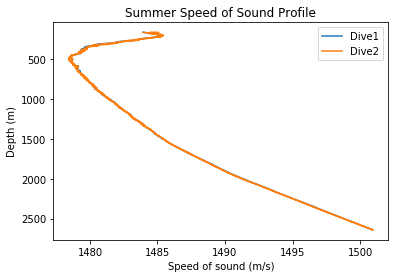

In [349]:
i = 0
c = 0
while i < sdivecount*2:
    plt.plot(sSSP[int(sgraphdives[i]):int(sgraphdives[i+1])],sPress[int(sgraphdives[i]):int(sgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.title('Summer Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

In [350]:
i = 0
c = 0
while i < sdivecount*2:
    q = int(sgraphdives[i])
    w = int(sgraphdives[i+1])
    print('The start of dive ' + str(c+1) + ' is ' + str(sectodatetime(sTime[q]-57600)))
    print('The end of dive ' + str(c+1) + ' is ' + str(sectodatetime(sTime[w]-57600)))
    i+=2
    c+=1

The start of dive 1 is Wednesday, July 17, 2019 01:01:28
The end of dive 1 is Wednesday, July 17, 2019 03:40:15
The start of dive 2 is Wednesday, July 17, 2019 03:45:02
The end of dive 2 is Wednesday, July 17, 2019 03:39:20


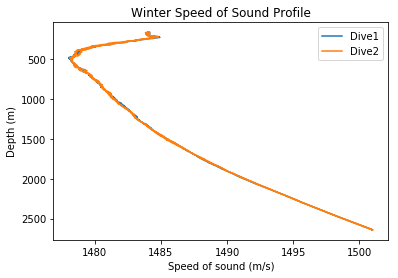

In [351]:
i = 0
c = 0
while i < wdivecount*2:
    plt.plot(wSSP[int(wgraphdives[i]):int(wgraphdives[i+1])],wPress[int(wgraphdives[i]):int(wgraphdives[i+1])], label = 'Dive' +str(c+1))
    i+=2
    c+=1
plt.title('Winter Speed of Sound Profile')
plt.gca().invert_yaxis()
plt.xlabel('Speed of sound (m/s)')
plt.ylabel('Depth (m)')
plt.legend()
plt.show()

In [352]:
i = 0
c = 0
while i < wdivecount*2:
    q = int(wgraphdives[i])
    w = int(wgraphdives[i+1])
    print('The start of dive ' + str(c+1) + ' is ' + str(sectodatetime(wTime[q]-57600)))
    print('The end of dive ' + str(c+1) + ' is ' + str(sectodatetime(wTime[w]-57600)))
    i+=2
    c+=1

The start of dive 1 is Wednesday, January 01, 2020 12:00:32
The end of dive 1 is Wednesday, January 01, 2020 02:43:28
The start of dive 2 is Wednesday, January 01, 2020 02:48:27
The end of dive 2 is Wednesday, January 01, 2020 02:43:40
